In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer el DataFrame desde el archivo CSV
df = pd.read_csv('comentarios_mejorados.csv')

In [3]:
# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Obtener información general sobre el DataFrame
print("\nInformación general sobre el DataFrame:")
print(df.info())

Primeras filas del DataFrame:
                  channelId      videoId  \
0  UCmb0LnmFYceH7toqgmUTJDA  nte0e0p4gwk   
1  UCmb0LnmFYceH7toqgmUTJDA  nte0e0p4gwk   
2  UCmb0LnmFYceH7toqgmUTJDA  nte0e0p4gwk   
3  UCmb0LnmFYceH7toqgmUTJDA  nte0e0p4gwk   
4  UCmb0LnmFYceH7toqgmUTJDA  nte0e0p4gwk   

                                         textDisplay  \
0  este enero no decepcionó, space for the unboun...   
1  Oportunidad perdida de crear algo totalmente n...   
2  De verdad que el Game pass es un servicio muy ...   
3                                    Juegazo es poco   
4  Ole x un juego que pega en lo verdaderamente d...   

                                        textOriginal  \
0  este enero no decepcionó, space for the unboun...   
1  Oportunidad perdida de crear algo totalmente n...   
2  De verdad que el Game pass es un servicio muy ...   
3                                    Juegazo es poco   
4  Ole x un juego que pega en lo verdaderamente d...   

                 authorDisplayN

In [4]:
# Estadísticas básicas de las columnas numéricas
print("\nEstadísticas básicas de las columnas numéricas:")
print(df.describe())


Estadísticas básicas de las columnas numéricas:
        likeCount
count  182.000000
mean     3.236264
std     12.487970
min      0.000000
25%      0.000000
50%      1.000000
75%      3.000000
max    162.000000


In [5]:
# Conteo de valores únicos en cada columna
print("\nConteo de valores únicos en cada columna:")
print(df.nunique())



Conteo de valores únicos en cada columna:
channelId                  1
videoId                    1
textDisplay              181
textOriginal             181
authorDisplayName        105
authorProfileImageUrl    105
authorChannelUrl         120
authorChannelId          105
canRate                    1
viewerRating               1
likeCount                 18
publishedAt              181
updatedAt                181
parentId                  18
dtype: int64


In [6]:

# Conteo de valores en una columna específica
print("\nConteo de valores en la columna 'canRate':")
print(df['canRate'].value_counts())


Conteo de valores en la columna 'canRate':
True    182
Name: canRate, dtype: int64


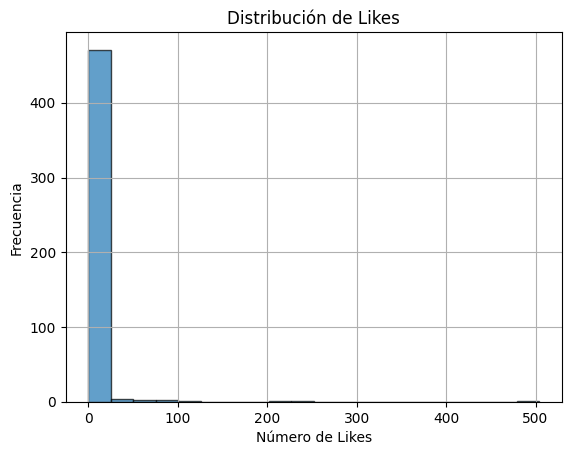

In [7]:
# Visualizar la distribución de likesCount
df['likeCount'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Likes')
plt.xlabel('Número de Likes')
plt.ylabel('Frecuencia')
plt.show()

## Preprocesamiento de texto ##

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
# Descargar los recursos necesarios para nltk (solo es necesario ejecutarlo una vez)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Función de preprocesamiento de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    
    # Eliminar stopwords (palabras irrelevantes)
    stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])
    
    return text

In [9]:
# Aplicar la función de preprocesamiento a la columna 'textDisplay'
df['textDisplay_processed'] = df['textDisplay'].apply(preprocess_text)

In [10]:
# Visualizar las primeras filas del DataFrame con la columna procesada
print(df[['textDisplay', 'textDisplay_processed']].head())

                                         textDisplay  \
0  este enero no decepcionó, space for the unboun...   
1  Oportunidad perdida de crear algo totalmente n...   
2  De verdad que el Game pass es un servicio muy ...   
3                                    Juegazo es poco   
4  Ole x un juego que pega en lo verdaderamente d...   

                               textDisplay_processed  
0  enero decepcionó space for the unbound hi fi r...  
1  oportunidad perdida crear totalmente nuevo fas...  
2           verdad game pass servicio completo mejor  
3                                            juegazo  
4          ole x juego pega verdaderamente divertido  


En este código:

- Se define una función preprocess_text que realiza la conversión a minúsculas, elimina signos de puntuación y caracteres especiales, y elimina palabras irrelevantes (stopwords) en español utilizando la biblioteca NLTK.
- Se aplica esta función a la columna textDisplay y se crea una nueva columna llamada textDisplay_processed en el DataFrame.
- Se muestra las primeras filas del DataFrame con las columnas originales y la columna procesada.

## Análisis de sentimientos ##

In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
# Inicializar el analizador de sentimientos de VADER
sid = SentimentIntensityAnalyzer()

In [14]:
# Función para obtener la polaridad del sentimiento
def get_sentiment_polarity(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

In [15]:
print(df['textDisplay_processed'])

0      enero decepcionó space for the unbound hi fi r...
1      oportunidad perdida crear totalmente nuevo fas...
2               verdad game pass servicio completo mejor
3                                                juegazo
4              ole x juego pega verdaderamente divertido
                             ...                        
177                                          enhorabuena
178                                    desgastó escribir
179                                           primero xd
180                                           primero xd
181                                                 hola
Name: textDisplay_processed, Length: 182, dtype: object


In [16]:
# Aplicar la función al DataFrame y crear una nueva columna 'sentiment_polarity'
df['sentiment_polarity'] = df['textDisplay_processed'].apply(get_sentiment_polarity)

# Visualizar las primeras filas del DataFrame con la columna de polaridad del sentimiento
print(df[['textDisplay_processed', 'sentiment_polarity']].head())

                               textDisplay_processed  sentiment_polarity
0  enero decepcionó space for the unbound hi fi r...             -0.6486
1  oportunidad perdida crear totalmente nuevo fas...              0.0000
2           verdad game pass servicio completo mejor              0.0000
3                                            juegazo              0.0000
4          ole x juego pega verdaderamente divertido              0.0000


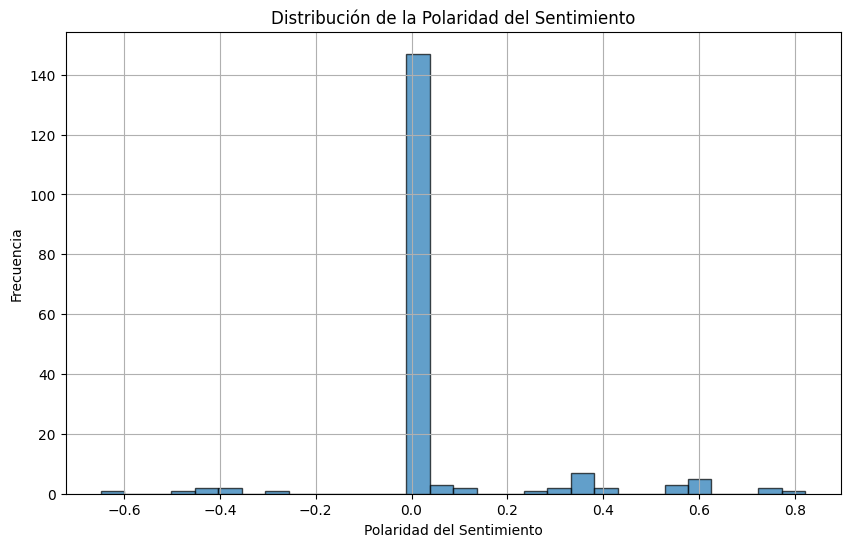

In [17]:
# Histograma de la polaridad del sentimiento
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_polarity'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la Polaridad del Sentimiento')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [20]:
# Filtrar comentarios con polaridad mayor a 0
positivos = df[df['sentiment_polarity'] > 0]

# Filtrar comentarios con polaridad menor a 0
negativos = df[df['sentiment_polarity'] < 0]

# Guardar en CSV
positivos.to_csv('comentarios_positivos.csv', index=False)
negativos.to_csv('comentarios_negativos_BERT.csv', index=False)

### Spacy ###

python -m spacy download es_core_news_sm


In [21]:
import spacy
import pathlib
nlp = spacy.load("es_core_news_sm")
model_path = pathlib.Path(nlp.path)
print(model_path)

c:\Users\dylan\AppData\Local\Programs\Python\Python38\lib\site-packages\es_core_news_sm\es_core_news_sm-3.7.0


In [22]:
# Función para obtener la polaridad del sentimiento con spaCy
def get_spacy_sentiment(text):
    doc = nlp(text)
    return doc.sentiment

In [23]:
# Aplicar la función al DataFrame y crear una nueva columna 'spacy_sentiment'
df['spacy_sentiment'] = df['textDisplay_processed'].apply(get_spacy_sentiment)


In [24]:

# Visualizar las primeras filas del DataFrame con la columna de sentimiento de spaCy
print(df[['textDisplay_processed', 'spacy_sentiment']].head())

                               textDisplay_processed  spacy_sentiment
0  tremenda basura mejor juego señor anillos sido...              0.0
1  peor juego the lord of the rings solo comprare...              0.0
2                pues contaste parece tan mal verdad              0.0
3                  serie amazon tan mal juego basura              0.0
4  después fracasos señor anillos jamas volvera s...              0.0


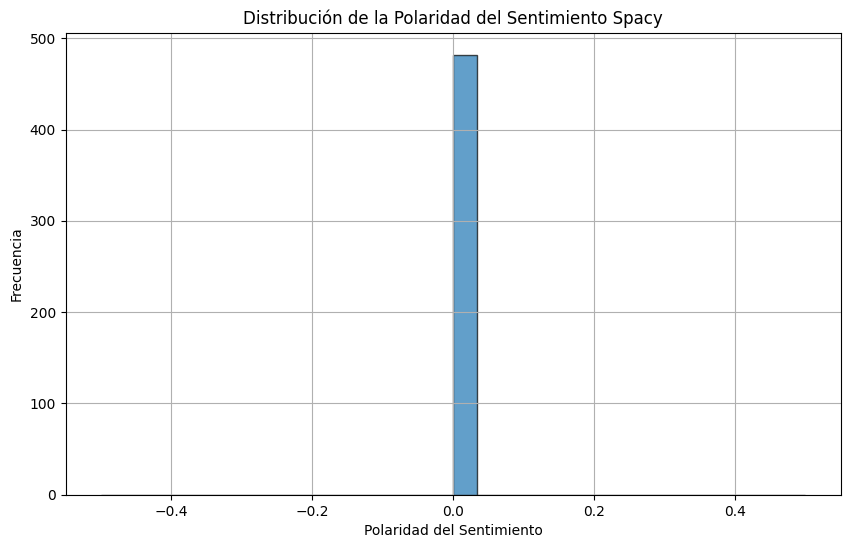

In [25]:
# Histograma de la polaridad del sentimiento spacy
plt.figure(figsize=(10, 6))
plt.hist(df['spacy_sentiment'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la Polaridad del Sentimiento Spacy')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [26]:
df.to_csv('df_spacy.csv', sep=',', index=False)

In [ ]:
# Filtrar comentarios con polaridad distinta de 0 en el DataFrame original
df_spacy = df[df['spacy_sentiment'] != 0]

# Visualizar las primeras filas del nuevo DataFrame
print(df_spacy[['textDisplay_processed', 'spacy_sentiment']].head())

In [ ]:
print(df['spacy_sentiment'].unique())


In [ ]:
# Imprimir información sobre el modelo
nlp = spacy.load('es_core_news_sm')
print(nlp.meta)

In [ ]:
oracion_positiva = "Este producto es increíble y me encanta."
doc_positivo = nlp(oracion_positiva)
print(f"Polaridad de la oración positiva: {doc_positivo.sentiment}")

oracion_negativa = "Este producto es terrible y no lo recomendaría a nadie."
doc_negativo = nlp(oracion_negativa)
print(f"Polaridad de la oración negativa: {doc_negativo.sentiment}")



## BERT ##

In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [28]:
tokenizer = AutoTokenizer.from_pretrained("edumunozsala/bertin_base_sentiment_analysis_es")
model = AutoModelForSequenceClassification.from_pretrained("edumunozsala/bertin_base_sentiment_analysis_es")

In [29]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("edumunozsala/bertin_base_sentiment_analysis_es")
model = AutoModelForSequenceClassification.from_pretrained("edumunozsala/bertin_base_sentiment_analysis_es")

text ="Se trata de una película interesante, con un solido argumento y un gran interpretación de su actor principal"

input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)
outputs = model(input_ids)
output = outputs.logits.argmax(1)


In [30]:
tokens = tokenizer(negativos['textDisplay_processed'].tolist(), return_tensors='pt', padding=True)
output = model.forward(tokens['input_ids'])
probs = output[0].softmax(dim=1)
print(probs)



We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[9.9916e-01, 8.3730e-04],
        [9.9857e-01, 1.4313e-03],
        [9.9793e-01, 2.0712e-03],
        [9.8625e-01, 1.3754e-02],
        [9.7643e-01, 2.3568e-02],
        [9.7448e-01, 2.5519e-02],
        [8.6267e-01, 1.3733e-01],
        [9.3410e-01, 6.5897e-02],
        [9.8925e-01, 1.0746e-02],
        [8.4730e-01, 1.5270e-01],
        [9.2335e-01, 7.6646e-02],
        [9.9929e-01, 7.0960e-04],
        [9.1850e-01, 8.1501e-02],
        [9.3635e-01, 6.3649e-02],
        [9.8862e-01, 1.1380e-02],
        [9.9575e-01, 4.2464e-03],
        [9.9548e-01, 4.5200e-03],
        [9.9127e-01, 8.7335e-03],
        [9.9736e-01, 2.6352e-03],
        [9.8263e-01, 1.7372e-02],
        [9.3392e-01, 6.6082e-02],
        [9.4283e-01, 5.7174e-02],
        [9.7534e-01, 2.4664e-02],
        [9.6529e-01, 3.4713e-02],
        [9.4745e-01, 5.2545e-02],
        [8.6736e-01, 1.3264e-01],
        [9.5369e-01, 4.6308e-02]], grad_fn=<SoftmaxBackward0>)


In [31]:
tokens = tokenizer(negativos['textDisplay_processed'].tolist(), return_tensors='pt', padding=True)
output = model.forward(tokens['input_ids'])
probs = output[0].softmax(dim=1)
print(probs)



tensor([[9.9916e-01, 8.3730e-04],
        [9.9857e-01, 1.4313e-03],
        [9.9793e-01, 2.0712e-03],
        [9.8625e-01, 1.3754e-02],
        [9.7643e-01, 2.3568e-02],
        [9.7448e-01, 2.5519e-02],
        [8.6267e-01, 1.3733e-01],
        [9.3410e-01, 6.5897e-02],
        [9.8925e-01, 1.0746e-02],
        [8.4730e-01, 1.5270e-01],
        [9.2335e-01, 7.6646e-02],
        [9.9929e-01, 7.0960e-04],
        [9.1850e-01, 8.1501e-02],
        [9.3635e-01, 6.3649e-02],
        [9.8862e-01, 1.1380e-02],
        [9.9575e-01, 4.2464e-03],
        [9.9548e-01, 4.5200e-03],
        [9.9127e-01, 8.7335e-03],
        [9.9736e-01, 2.6352e-03],
        [9.8263e-01, 1.7372e-02],
        [9.3392e-01, 6.6082e-02],
        [9.4283e-01, 5.7174e-02],
        [9.7534e-01, 2.4664e-02],
        [9.6529e-01, 3.4713e-02],
        [9.4745e-01, 5.2545e-02],
        [8.6736e-01, 1.3264e-01],
        [9.5369e-01, 4.6308e-02]], grad_fn=<SoftmaxBackward0>)


In [32]:
preds = probs.argmax(dim=1)
labels = {0: 'negativo', 1: 'positivo', 2: 'neutro'}
preds = pd.Series(preds)
negativos['sentiment_BERT'] = preds.apply(lambda x: labels[x])


C:\Users\dylan\AppData\Local\Temp\ipykernel_23520\807104970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativos['sentiment_BERT'] = preds.apply(lambda x: labels[x])


In [33]:
negativos.to_csv('comentarios_negativos_BERT.csv', index=False)

In [34]:
negativos['sentiment_BERT'].head()

34     NaN
64     NaN
96     NaN
98     NaN
125    NaN
Name: sentiment_BERT, dtype: object

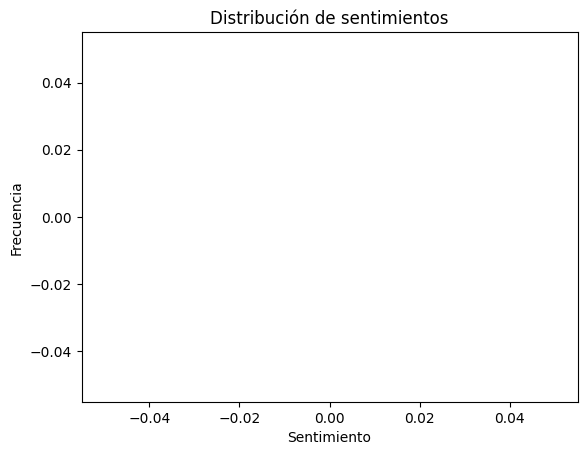

In [35]:
# Contar la frecuencia de cada valor en la columna 'sentiment'
counts = negativos['sentiment_BERT'].value_counts()

# Crear un gráfico de barras con los nombres y las frecuencias de las categorías
plt.bar(counts.index, counts.values)

# Añadir títulos y etiquetas a los ejes
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [36]:
import spacy

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Ejemplos de frases
frases = ["Este juego es increíblemente bueno.",
          "La pantalla de carga dura demasiado tiempo.",
          "No estoy seguro de cómo me siento acerca de este juego."]

# Función para obtener la polaridad promedio de una frase con spaCy
def get_spacy_sentiment(text):
    doc = nlp(text)
    
    # Calcular la polaridad promedio de las palabras en la oración
    polarity = sum([token.sentiment for token in doc]) / len(doc)
    
    return polarity

# Aplicar la función a las frases
for frase in frases:
    polaridad = get_spacy_sentiment(frase)
    print(f"Frase: '{frase}' - Polaridad: {polaridad}")


Frase: 'Este juego es increíblemente bueno.' - Polaridad: 0.0
Frase: 'La pantalla de carga dura demasiado tiempo.' - Polaridad: 0.0
Frase: 'No estoy seguro de cómo me siento acerca de este juego.' - Polaridad: 0.0
